# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [1]:
from sklearn.datasets import fetch_california_housing

In [13]:
california = fetch_california_housing()

In [14]:
type(california)
# bunch라는 사이킷런의 자료구조가 있는데 딕셔너리와 유사함. 키와 밸류로 이루어져 있음 아래 데이터와 타켓이 일종의 키의 역할을 하는 거임.

sklearn.utils._bunch.Bunch

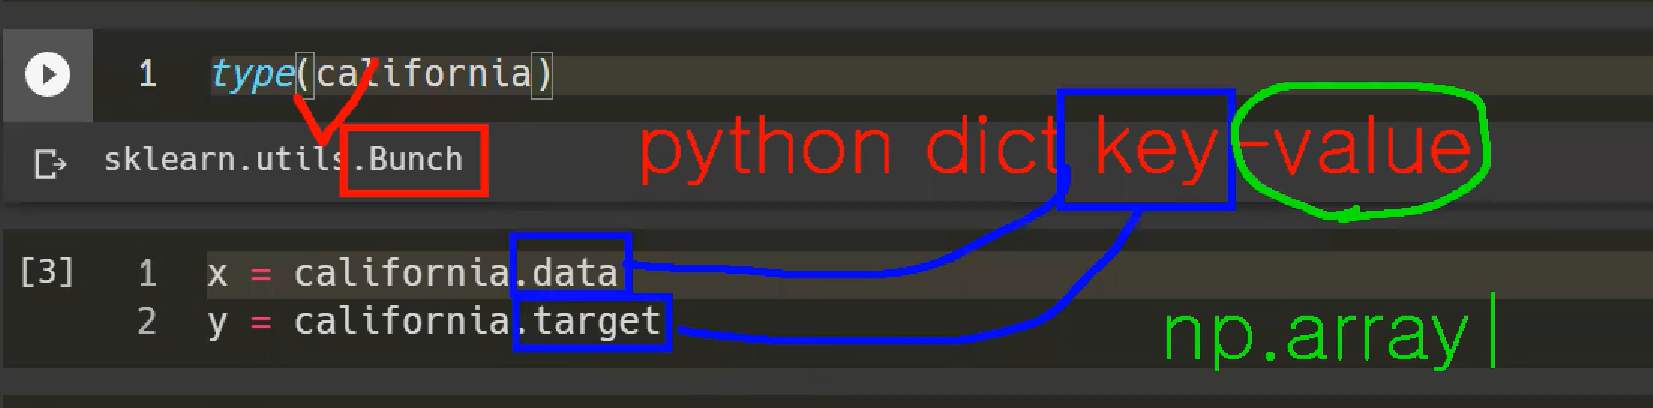

In [3]:
x = california.data
y = california.target

In [15]:
type(x), type(y) # 넘파이 어레이 형태이다.

(numpy.ndarray, numpy.ndarray)

In [16]:
# 어떻게 들어가있는지 궁금하다. x에 대해서 뜯어보자.
import pandas as pd
pd.DataFrame(x, columns=california.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
# y에 대해서 뜯어보자.
pd.DataFrame(y, columns=california.target_names)
# 집값의 중앙값이 나온다. 연속적으로 셀 수 있는 값 >> 회귀

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [4]:
x.shape, y.shape

((20640, 8), (20640,))

In [5]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras

import numpy as np


In [19]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 모델 블록 조회
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(1))
# 4. 컴파일
model.compile(loss='mse', optimizer='adam')

# 양념
model.summary()
# 편향값이 하나 붙어서 학습되는 파라미터는 9개이고, 구체적으로 표시하자면 y = w

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


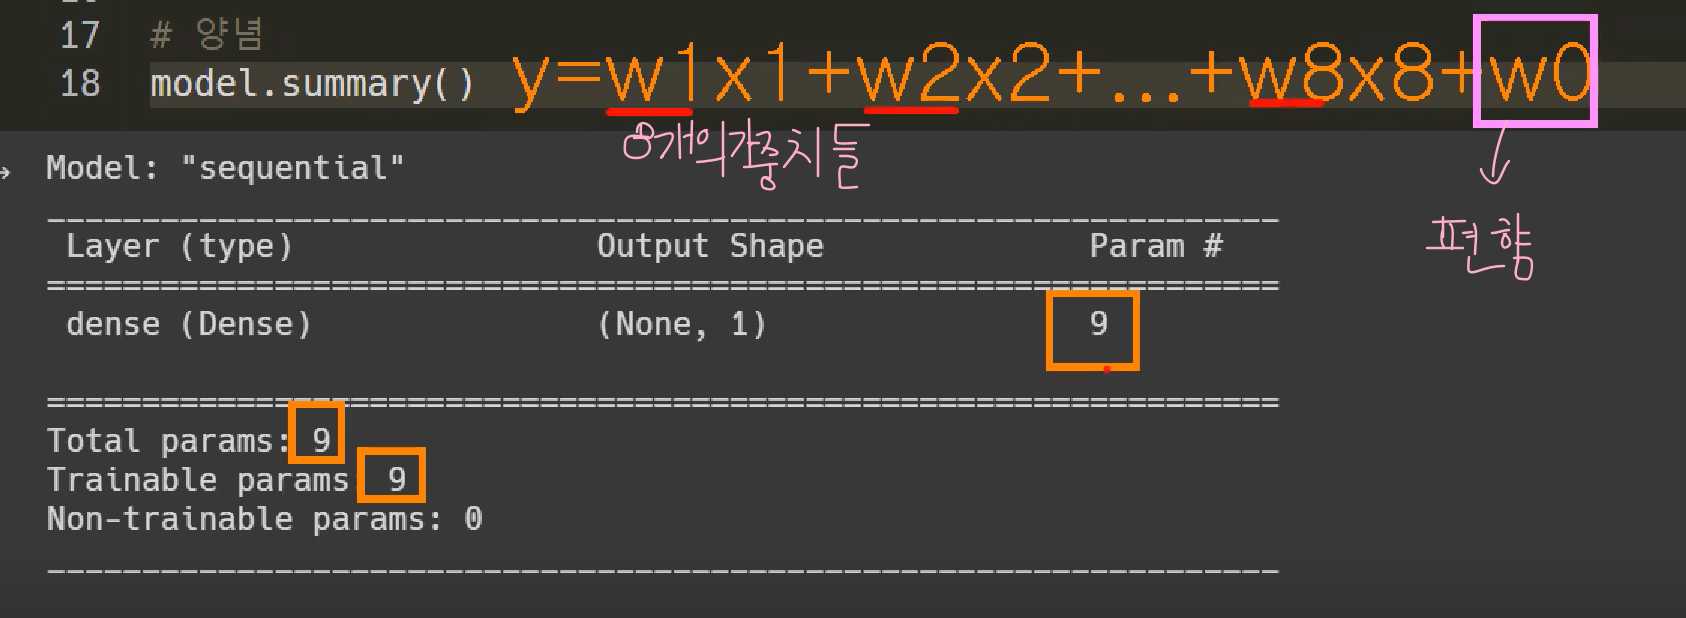

In [20]:
###########
# 모델 학습
###########
model.fit(x, y, epochs=10, verbose=1)


Epoch 1/10
645/645 [==============================] - 2s 2ms/step - loss: 4529.4839
Epoch 2/10
645/645 [==============================] - 1s 1ms/step - loss: 192.4250
Epoch 3/10
645/645 [==============================] - 1s 1ms/step - loss: 8.7173
Epoch 4/10
645/645 [==============================] - 1s 1ms/step - loss: 6.0869
Epoch 5/10
645/645 [==============================] - 1s 1ms/step - loss: 5.2039
Epoch 6/10
645/645 [==============================] - 1s 1ms/step - loss: 4.2941
Epoch 7/10
645/645 [==============================] - 1s 1ms/step - loss: 3.4027
Epoch 8/10
645/645 [==============================] - 1s 2ms/step - loss: 2.6197
Epoch 9/10
645/645 [==============================] - 1s 1ms/step - loss: 1.9628
Epoch 10/10
645/645 [==============================] - 1s 1ms/step - loss: 1.5032


In [21]:
###########
# 모델 예측
###########
y_pred = model.predict(x)


645/645 [==============================] - 1s 2ms/step


In [22]:
y_pred.reshape(-1)

array([3.152618  , 3.1167462 , 2.1651304 , ..., 0.4570706 , 0.5563785 ,
       0.69837606], dtype=float32)

In [23]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# 히든 레이어 추가하여 모델링!
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

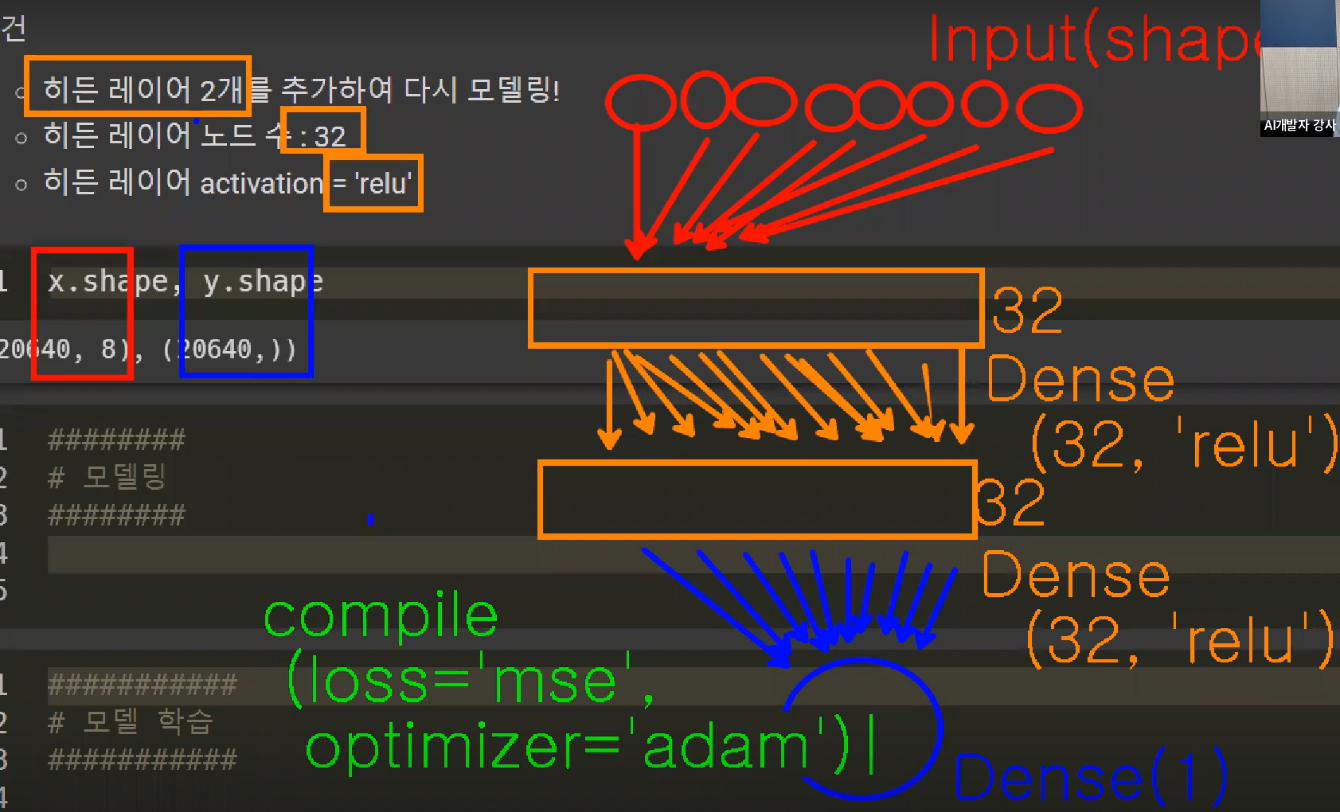

In [30]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 모델 블록 조립
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1))
# 4. 컴파일
model.compile(loss='mse', optimizer='adam')
# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [31]:
###########
# 모델 학습
###########
model.fit(x, y, epochs=10, verbose=1)


Epoch 1/10
645/645 [==============================] - 3s 3ms/step - loss: 52.0027
Epoch 2/10
645/645 [==============================] - 3s 5ms/step - loss: 4.4110
Epoch 3/10
645/645 [==============================] - 3s 4ms/step - loss: 2.3009
Epoch 4/10
645/645 [==============================] - 2s 4ms/step - loss: 16.5157
Epoch 5/10
645/645 [==============================] - 2s 3ms/step - loss: 1.3812
Epoch 6/10
645/645 [==============================] - 2s 3ms/step - loss: 18.0261
Epoch 7/10
645/645 [==============================] - 2s 2ms/step - loss: 1.2027
Epoch 8/10
645/645 [==============================] - 2s 3ms/step - loss: 2.4311
Epoch 9/10
645/645 [==============================] - 2s 3ms/step - loss: 1.4426
Epoch 10/10
645/645 [==============================] - 2s 2ms/step - loss: 9.6017


In [32]:
###########
# 모델 예측
###########
y_pred = model.predict(x)


645/645 [==============================] - 2s 2ms/step


In [33]:
y_pred.reshape(-1)[:5]

array([3.8779964, 3.5311728, 3.834035 , 3.144247 , 2.5441332],
      dtype=float32)

In [34]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])